In [66]:
#Import libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [6]:
#Import the data
df = pd.read_excel(r'D:\Development\Programming\AI\Kaggle\Titanic Dataset\titanic3.xls')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
print("Data Shape: ", df.shape)

Data Shape:  (1309, 14)


In [8]:
print("Data Columns: ", df.columns)

Data Columns:  Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [9]:
print("Data Types: ", df.dtypes)

Data Types:  pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object


In [10]:
print("Data Info: ", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
Data Info:  None


In [11]:
print("Data Description: ", df.describe())

Data Description:              pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


In [14]:
print("Data Description (Categorical): ", df.describe(include='object'))

Data Description (Categorical):                          name   sex    ticket        cabin embarked boat  \
count                   1309  1309      1309          295     1307  486   
unique                  1307     2       939          186        3   28   
top     Connolly, Miss. Kate  male  CA. 2343  C23 C25 C27        S   13   
freq                       2   843        11            6      914   39   

           home.dest  
count            745  
unique           369  
top     New York, NY  
freq              64  


In [15]:
print("Data Null Values: ", df.isnull().sum())

Data Null Values:  pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [ ]:
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4088\3727767796.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_4088\3727767796.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [37]:
df['fare'].fillna(df['fare'].median(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4088\4242156193.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fare'].fillna(df['fare'].median(), inplace=True)


In [40]:
df['body'].fillna(df['body'].median(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4088\2428105441.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['body'].fillna(df['body'].median(), inplace=True)


In [41]:
print("Data Null Values: ", df.isnull().sum())

Data Null Values:  pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
body        0
dtype: int64


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.describe(include='object')

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,939,186,3,28,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [18]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
#Encoding categorical variables
df['sex'].replace({'male': 1 , 'female': 0}, inplace=True)
df['embarked'].replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4088\2436163329.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'].replace({'male': 1 , 'female': 0}, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_4088\2436163329.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].replace(

In [22]:
df.drop('home.dest', axis=1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   int64  
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   float64
 11  boat      486 non-null    object 
 12  body      121 non-null    float64
dtypes: float64(4), int64(5), object(4)
memory usage: 133.1+ KB


In [24]:
df.describe(include='object')

,name,ticket,cabin,boat
count,1309,1309,295,486
unique,1307,939,186,28
top,"Connolly, Miss. Kate",CA. 2343,C23 C25 C27,13
freq,2,11,6,39


In [ ]:
df.drop('ticket', axis=1, inplace=True)
df.drop('cabin', axis=1, inplace=True)
df.drop('boat', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)

In [55]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,body
0,1,1,0,29.0000,0,0,211.3375,0.0,155.0
1,1,1,1,0.9167,1,2,151.5500,0.0,155.0
2,1,0,0,2.0000,1,2,151.5500,0.0,155.0
3,1,0,1,30.0000,1,2,151.5500,0.0,135.0
4,1,0,0,25.0000,1,2,151.5500,0.0,155.0


In [57]:
x = df.drop(['survived'], axis=1)
y = df['survived']
print("X Shape: ", x.shape)
print("Y Shape: ", y.shape)

X Shape:  (1309, 8)
Y Shape:  (1309,)


In [58]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-1.54609786, -1.34499549, -0.03900549, ...,  3.44258413,
        -0.60343572, -0.01812643],
       [-1.54609786,  0.74349692, -2.21595217, ...,  2.2866387 ,
        -0.60343572, -0.01812643],
       [-1.54609786, -1.34499549, -2.13197749, ...,  2.2866387 ,
        -0.60343572, -0.01812643],
       ...,
       [ 0.84191642,  0.74349692, -0.23279919, ..., -0.50377442,
         0.92737312,  5.01088881],
       [ 0.84191642,  0.74349692, -0.19404045, ..., -0.50377442,
         0.92737312, -0.01812643],
       [ 0.84191642,  0.74349692, -0.03900549, ..., -0.49120717,
        -0.60343572, -0.01812643]])

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
y_pred = model.predict(x_test)

In [67]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8053435114503816
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       144
           1       0.83      0.72      0.77       118

    accuracy                           0.81       262
   macro avg       0.81      0.80      0.80       262
weighted avg       0.81      0.81      0.80       262



In [ ]:
import seaborn as sns

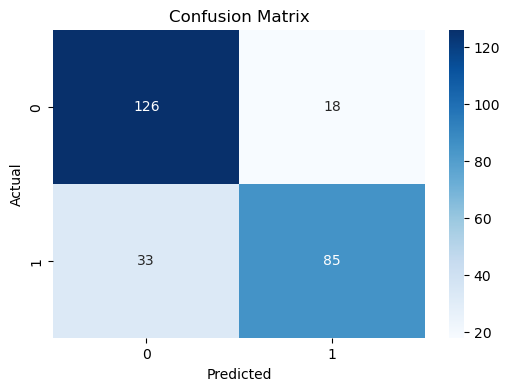

In [70]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

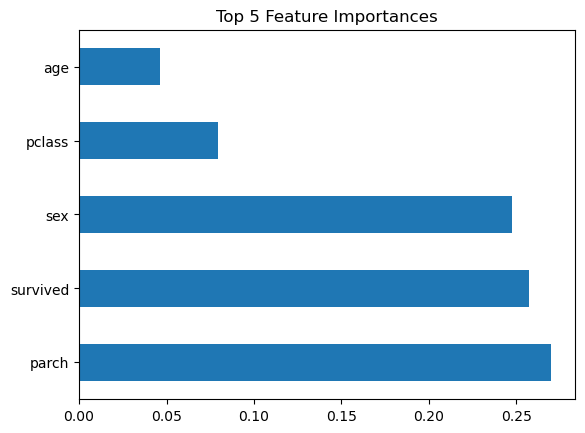

In [71]:
feat_importances = pd.Series(model.feature_importances_, index= df.columns[:-1])
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Top 5 Feature Importances")
plt.show()